In [1]:
import matplotlib.pyplot as plt

from project_config import get_data_path
from src.SolverAnalyses import ConvergenceAnalysis
from src.DataFrameAnalyses import DataFramePlotGenerator

In [8]:
logs_path = get_data_path("solver_logs")
log_path = logs_path / "experiment014_shift_03.log"

In [9]:
df_cp_logs = ConvergenceAnalysis.parse_cp_sat_bound_log_to_dataframe(
    file_path=log_path,

)
df_cp_logs

,Time,BestSol
0,0.09,13610.0
1,0.09,13610.0
2,0.10,13610.0
3,0.11,13610.0
4,0.12,13610.0
5,0.15,13610.0
6,1.49,5902.0
7,1.49,5902.0
8,1.49,5902.0
9,2.21,4200.0


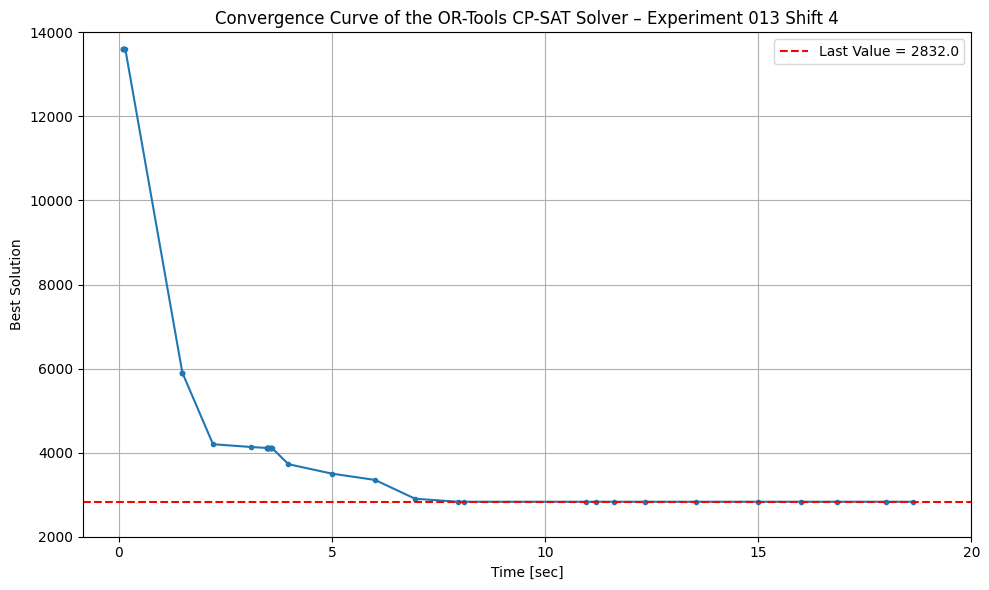

In [10]:
fig = DataFramePlotGenerator.get_convergence_plot_figure(df_cp_logs, time_col="Time", bestsol_col="BestSol", granularity="auto",subtitle="Experiment 013 Shift 4",
    y_max= None
)
last_val = df_cp_logs["BestSol"].iloc[-1]

ax = fig.axes[0]
ax.axhline(y=last_val, color="red", linestyle="--", label=f"Last Value = {last_val}")
ax.legend()
plt.show()

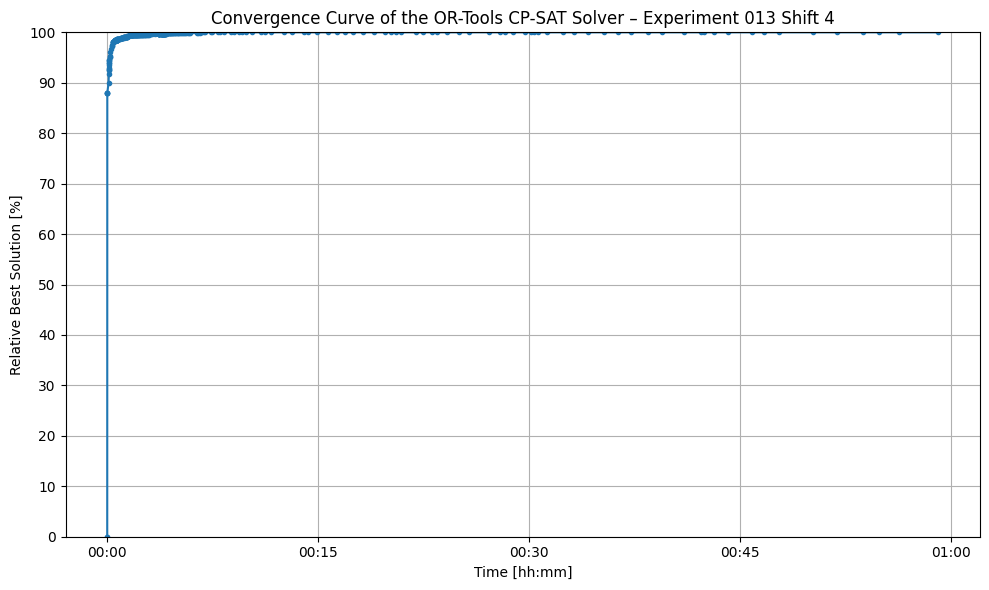

In [5]:
# DataFrame df_cp_logs existiert bereits
fig = DataFramePlotGenerator.get_relative_convergence_plot_figure(
    df_cp_logs,
    time_col="Time",
    bestsol_col="BestSol",
    subtitle="Experiment 013 Shift 4",
    max_time=3600,        # optional: nur erste 3600 Sekunden
    granularity="auto",   # optional
    marker="."
)

plt.show()